In [ ]:
import numpy as np
import cv2
import os
from utils import *
from math import sqrt, atan2, exp
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
## load the data
path = os.getcwd() + '/../data/'  
images_np = images_np_load(path, plot=False)

已加载: 5.jpg, 尺寸: (3, 250, 286)
已加载: 3.jpg, 尺寸: (3, 204, 275)
已加载: 1.jpg, 尺寸: (3, 241, 321)
已加载: 4.jpg, 尺寸: (3, 305, 305)
已加载: 2.jpg, 尺寸: (3, 223, 296)


In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_self_similarity_descriptor(image, patch_size=5, search_radius=30):
    """
    计算图像的局部自相似性描述符，包括log-polar坐标转换。
    image: 输入图像，形状为 (H, W, C)，假设是RGB图像
    patch_size: 每个局部区域的大小
    search_radius: 搜索范围，用来搜索与目标patch相似的区域
    """
    H, W, C = image.shape  # 确保图像是(H, W, C)格式
    descriptors = np.zeros((H, W))  # 存储每个像素点的描述符（这里只存储一个log-polar值）

    # 遍历每个像素，计算自相似描述符
    for y in range(patch_size//2, H - patch_size//2):
        for x in range(patch_size//2, W - patch_size//2):
            # 提取以(x, y)为中心的patch
            patch = image[y - patch_size//2 : y + patch_size//2 + 1, x - patch_size//2 : x + patch_size//2 + 1]

            # 计算相似度
            correlation_surface = np.zeros((H, W))
            for dy in range(-search_radius, search_radius + 1):
                for dx in range(-search_radius, search_radius + 1):
                    if 0 <= y + dy < H and 0 <= x + dx < W:
                        # 提取与目标点的相关区域并计算相似度
                        neighbor_patch = image[y + dy - patch_size//2 : y + dy + patch_size//2 + 1,
                                               x + dx - patch_size//2 : x + dx + patch_size//2 + 1]
                        # 计算相关性，使用归一化的相关性
                        correlation_surface[y + dy, x + dx] = np.sum(patch * neighbor_patch) / (np.linalg.norm(patch) * np.linalg.norm(neighbor_patch))

            # 将相关性图转换为log-polar表示
            log_polar = cv2.logPolar(correlation_surface, (x, y), 40, flags=cv2.INTER_LINEAR)

            # 选择log-polar变换中的一个值（例如：选择中心位置的值）
            descriptors[y, x] = log_polar[patch_size//2, patch_size//2]

    return descriptors

# 示例图像：加载一张图像（假设图像已经是HWC格式，通常需要用OpenCV等库加载图像）
image = np.random.rand(256, 256, 3)  # 假设的图像：256x256尺寸，3通道（RGB）

# 计算自相似性描述符
descriptors = compute_self_similarity_descriptor(image, patch_size=5, search_radius=30)

# 可视化结果
plt.imshow(descriptors, cmap='gray')  # 可视化自相似性描述符
plt.title("Self-Similarity Descriptors")
plt.colorbar()
plt.show()


ValueError: operands could not be broadcast together with shapes (5,5,3) (0,0,3) 

In [ ]:

# 计算自相似性描述符
descriptors = compute_self_similarity_descriptor(image, patch_size=5, search_radius=30)


(286, 3, 45)


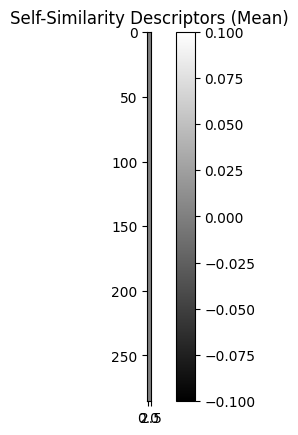

In [6]:
print(descriptors.shape)
# 可视化结果
plt.imshow(descriptors.mean(axis=2), cmap='gray')  # 取所有描述符的平均值进行可视化
plt.title("Self-Similarity Descriptors (Mean)")
plt.colorbar()
plt.show()
